In [1]:
import numpy as np
from scipy.io import loadmat
from scipy import signal, stats, fft
import matplotlib.pyplot as plt 

Load in vivo data

In [2]:
datafile = '/home/matt/data/InVivoLFPs/BLA_LFP_data/Part2SubjectHB15_AW.mat'
data = loadmat(datafile)

fs = data['fs'][0,0]
scale = data['scale'][0,0]
LFP_seg = [scale*x.ravel() for x in data['LFP_seg'].ravel()]

LFP_cat = np.concatenate(LFP_seg)

Get PSD of in vivo LFP and fit 1/f^a

In [3]:
nfft = 2**9 #7 # 128 samples
print(LFP_cat.shape)

f, Pxx = signal.welch(LFP_cat, fs=fs, window='hamming', nperseg=nfft, scaling='spectrum')
f = f.ravel()

f_cutoff = max(np.argmax(Pxx),1)
Pmax = Pxx[f_cutoff]
idx = np.arange(f_cutoff,f.size)
result = stats.linregress(np.log(f[idx]),np.log(Pxx[idx]))
b = result.intercept
a = -result.slope

f_cutoff = np.exp((b-np.log(Pmax))/a)
idx = f>f_cutoff
Pfit = Pxx.copy()
Pfit[idx] = np.exp(b)/f[idx]**a
Pfit[~idx] = Pmax

(2899042,)


Normalization factors for fourier coefficients in the loss function

In [4]:
norm_factor = np.sqrt(Pmax/Pfit)
print(norm_factor)
# Using FFT with nfft
print(nfft)

[  1.           1.           1.           1.47128996   1.97579912
   2.48348666   2.99372152   3.50608452   4.02027644   4.53607274
   5.05329858   5.57181389   6.09150391   6.61227283   7.13403948
   7.65673419   8.18029648   8.70467336   9.22981801   9.75568877
  10.28224831  10.809463    11.33730238  11.86573871  12.39474667
  12.924303    13.45438629  13.98497675  14.51605605  15.04760715
  15.57961418  16.1120623   16.64493763  17.17822713  17.71191857
  18.2460004   18.78046174  19.31529231  19.85048237  20.38602269
  20.92190451  21.45811949  21.99465971  22.53151762  23.068686
  23.60615798  24.14392697  24.68198667  25.22033104  25.75895431
  26.29785092  26.83701553  27.37644303  27.91612847  28.45606712
  28.99625439  29.53668588  30.07735733  30.61826464  31.15940385
  31.7007711   32.24236271  32.78417508  33.32620474  33.86844832
  34.41090256  34.95356431  35.49643049  36.03949814  36.58276435
  37.12622632  37.66988134  38.21372673  38.75775993  39.30197842
  39.8463797

Define function for generating pink noise

In [5]:
def pink_noise(f, alpha=1., fmin=0):
    """
    f: normalized frequencies
    alpha: exponent of pink noise
    fmin: Low-frequency cutoff
    """
    S = 1/np.where(f == 0, float('inf'), f**(alpha/2))
    if fmin>0:
        S[(f<fmin) & (f!=0)] = fmin**(-alpha/2)
    return S

def noise_gen(N, psd = lambda f: 1):
    f = fft.rfftfreq(N)
    Scale = psd(f)
    w = Scale[1:].copy()
    w[-1] *= (1 + (N % 2)) / 2. # correct f = +-0.5
    sigma = 2 * np.sqrt(np.sum(w**2)) / N
    sr = Scale * np.random.randn(len(f))
    si = Scale * np.random.randn(len(f))
    if not (N % 2): si[-1] = 0 # If the signal length is even, frequencies +/- 0.5 are equal, the coefficient must be real.
    si[0] = 0 # Regardless of signal length, the DC component must be real
    s  = sr + 1J * si
    X = fft.irfft(s) / sigma
    return X
print(fs)

1000


Generate pink noise and get its PSD

In [6]:
N = 2**((LFP_cat.size-1).bit_length()-1) # choose power of 2 samples
noise_psd = lambda f: pink_noise(f, alpha=a, fmin=f_cutoff/fs) # function for calculating noise psd
x_noise = np.std(LFP_cat) * noise_gen(N, psd = noise_psd)

In [40]:
sine55 = 5*np.sin(55*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine56 = 1*np.sin(56*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine57 = 1*np.sin(57*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine58 = 1*np.sin(58*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine59 = 1*np.sin(59*2*np.pi*(np.arange(x_noise.shape[0]) / fs))

sine60 = 3*np.sin(60*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine61 = 1*np.sin(61*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine62 = 1*np.sin(62*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine63 = 1*np.sin(63*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine64 = 1*np.sin(64*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine65 = 3.5*np.sin(65*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine66 = 1*np.sin(66*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine67 = 1*np.sin(67*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine68 = 1*np.sin(68*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine69 = 1*np.sin(69*2*np.pi*(np.arange(x_noise.shape[0]) / fs))

sine70 = 3*np.sin(70*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine71 = 1*np.sin(71*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine72 = 1*np.sin(72*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine73 = 1*np.sin(73*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine74 = 1*np.sin(74*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine75 = 1*np.sin(75*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine76 = 1*np.sin(76*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine77 = 1*np.sin(77*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine78 = 1*np.sin(78*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine79 = 1*np.sin(79*2*np.pi*(np.arange(x_noise.shape[0]) / fs))

sine80 = 3*np.sin(80*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine81 = 1*np.sin(81*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine82 = 1*np.sin(82*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine83 = 1*np.sin(83*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine84 = 1*np.sin(84*2*np.pi*(np.arange(x_noise.shape[0]) / fs))
sine85 = 1*np.sin(85*2*np.pi*(np.arange(x_noise.shape[0]) / fs))

gamma = (sine55 + sine56 + sine57 + sine58 + sine59 +
         sine60 + sine61 + sine62 + sine63 + sine64 + sine65 + sine66 + sine67 + sine68 + sine69 +
         sine70 + sine71 + sine72 + sine73 + sine74 + sine75 + sine76 + sine77 + sine78 + sine79 +
         sine80 + sine81 + sine82 + sine83 + sine84 + sine85)

pn_sine = x_noise + gamma
np.savez('/home/matt/data/InVivoLFPs/Generated/pn_multisine_gamma.npz', x=pn_sine, y=gamma)
print(pn_sine.shape)

(2097152,)


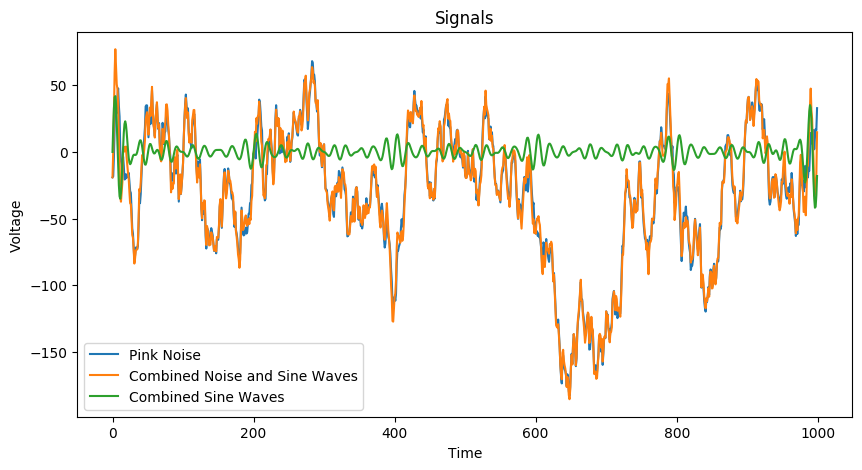

In [47]:
plt.figure(figsize=(10,5))

plt.plot(np.arange(x_noise.shape[0])[:1000], x_noise[:1000], label='Pink Noise')
plt.plot(np.arange(x_noise.shape[0])[:1000], pn_sine[:1000], label='Combined Noise and Sine Waves')
plt.plot(np.arange(x_noise.shape[0])[:1000], gamma[:1000], label='Combined Sine Waves')
plt.legend()
plt.title('Signals')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.show()

In [42]:
_, Pxx_noi = signal.welch(x_noise, fs=fs, window='hamming', nperseg=nfft, scaling='spectrum')
_, Pxx_sin = signal.welch(pn_sine, fs=fs, window='hamming', nperseg=nfft, scaling='spectrum')

# Compare power in each signal
print(np.std(LFP_cat))
print(np.std(x_noise))

53.89281228765393
54.034351858855366


Plot PSD

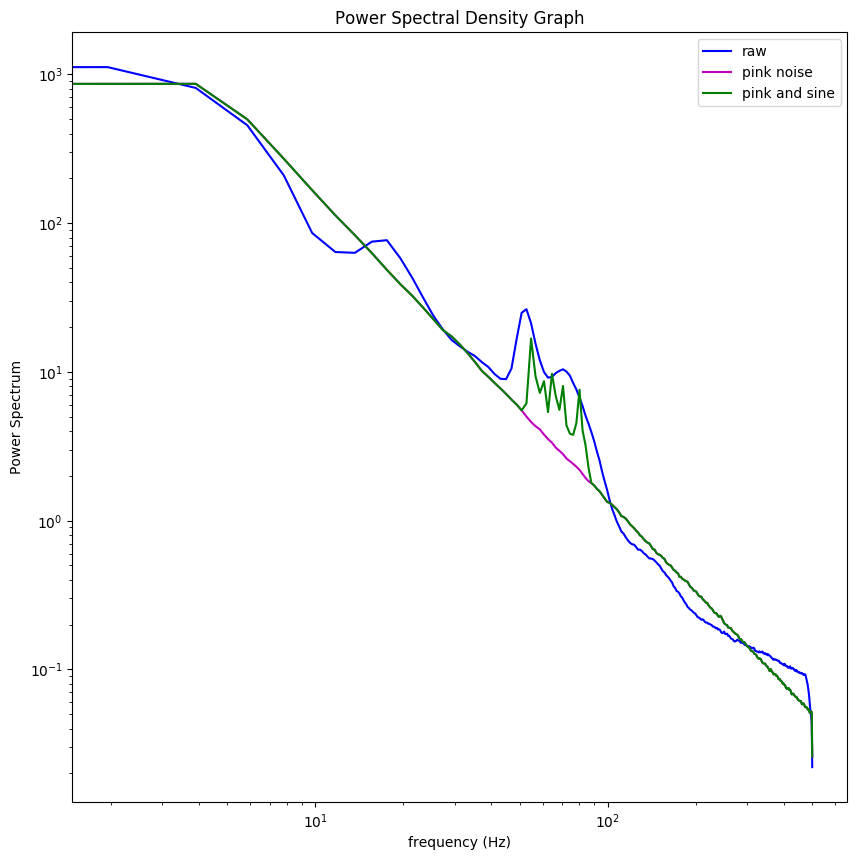

In [43]:
LinearScale = False

plt.figure(figsize=(10,10))
if LinearScale:
    plt.plot(f, Pxx, 'b', label='raw')
    # plt.plot(f, Pfit, 'r', label='fit')
    plt.plot(f, Pxx_noi, 'm', label='pink noise')
    plt.plot(f, Pxx_sin, 'g', label='pink and sine')
else:
    plt.loglog(f, Pxx, 'b', label='raw')
    # plt.loglog(f, Pfit, 'r', label='fit')
    plt.loglog(f, Pxx_noi, 'm', label='pink noise')
    plt.loglog(f, Pxx_sin, 'g', label='pink and sine')
plt.xlabel("frequency (Hz)")
plt.ylabel("Power Spectrum")
plt.title("Power Spectral Density Graph")
plt.legend()
plt.show()

Plot example pink noise trace

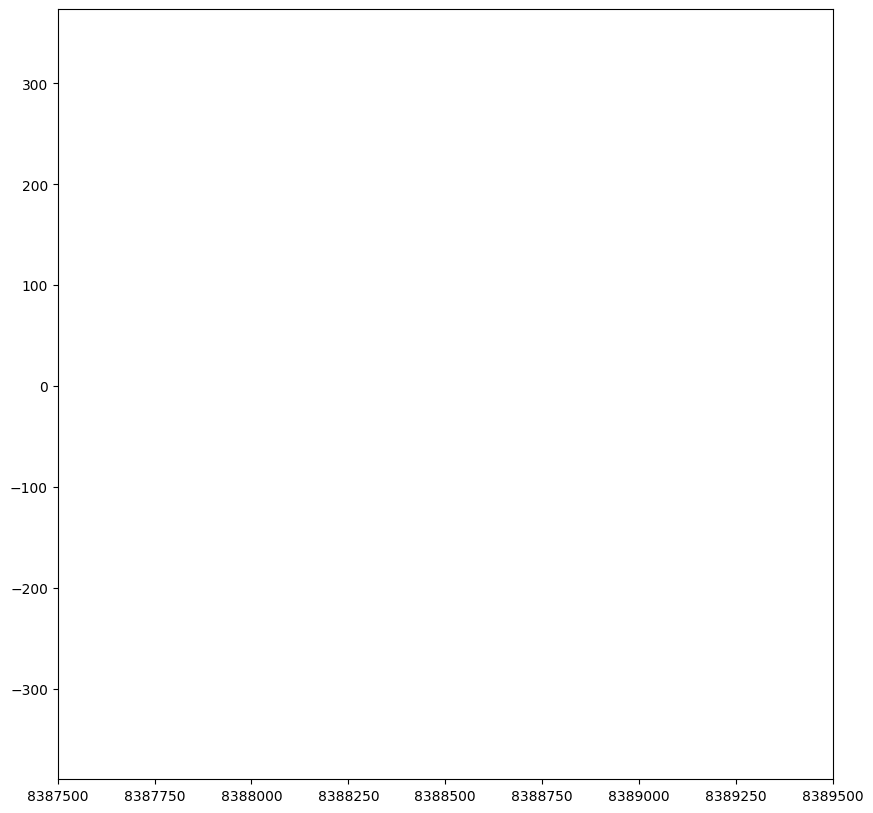

In [11]:
# %matplotlib inline

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(LFP_cat, 'b')
ax.plot(x_noise, 'r')
ax.set_xlim(left=8.3875e6, right=8.3895e6)
plt.show()